# ANÁLISIS DE ALERTA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_logins = pd.read_csv("Logins_Fallidos.csv") 

In [2]:
df_logins.head()

,_time,Servidor,vd,type,subtype,accion,devname,eventtime,level,logdesc,msg,reason,remip,tunneltype,user
0,Tue Aug 31 15:30:55 2021,FGT60E4Q16045068,root,event,vpn,ssl-login-fail,TJSM-BA,1630434653,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.89.208.251,ssl-web,ddistasi
1,Tue Aug 31 14:21:44 2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,1630430503940807968,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,186.22.56.221,ssl-web,e.bramos
2,Tue Aug 31 12:18:51 2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,1630423129365172184,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.229.220.155,ssl-web,readymind2
3,Tue Aug 31 12:18:31 2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,1630423110737284913,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.229.220.155,ssl-web,readymind2
4,Tue Aug 31 12:16:37 2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,1630422995366171961,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.229.220.155,ssl-web,MAD\readymind2


### Parseo el formato de fecha en columnas distintas

In [3]:
time = df_logins["_time"].apply(str.split)
lst_time = []
for i in range(0,len(time)-1):
    lst_time.append(time[i])
    
#Armo un dataframe con el datetime:
df_time = pd.DataFrame(lst_time, columns = ["dia_nombre", "mes_nombre", "dia_num", "hora", "año_num"])


In [4]:
#Concateno los dos dataframe:
df_Logins =pd.concat([df_time,df_logins], axis = 1) #axis=1 es para que sume como una columna más.
#Elimino la columna del campo datetime, ya no la necesito:
del df_Logins["_time"]
#print(df_Logins.head())

In [5]:
df_Logins = df_Logins.dropna(subset= ["dia_num"])
df_Logins.shape

(7020, 19)

In [6]:
df_Logins = df_Logins.astype({"dia_num": "int"})
df_Logins.dtypes

dia_nombre    object
mes_nombre    object
dia_num        int64
hora          object
año_num       object
Servidor      object
vd            object
type          object
subtype       object
accion        object
devname       object
eventtime      int64
level         object
logdesc       object
msg           object
reason        object
remip         object
tunneltype    object
user          object
dtype: object

In [7]:
_hora = df_Logins["hora"]
#.astype("string")
_hora.astype("str")
#_hora
_hora = _hora.str.split(':')


In [8]:
df_Logins.columns

Index(['dia_nombre', 'mes_nombre', 'dia_num', 'hora', 'año_num', 'Servidor',
       'vd', 'type', 'subtype', 'accion', 'devname', 'eventtime', 'level',
       'logdesc', 'msg', 'reason', 'remip', 'tunneltype', 'user'],
      dtype='object')

In [9]:
del df_Logins["hora"]
lst_hora = []
for i in range(0, len(_hora)):
    lst_hora.append(_hora[i])
#lst_hora



df_hora = pd.DataFrame(lst_hora, columns=["hora","minuto","segundo"])
df_Logins = pd.concat([df_Logins, df_hora], axis = 1)
df_Logins

,dia_nombre,mes_nombre,dia_num,año_num,Servidor,vd,type,subtype,accion,devname,...,level,logdesc,msg,reason,remip,tunneltype,user,hora,minuto,segundo
0,Tue,Aug,31,2021,FGT60E4Q16045068,root,event,vpn,ssl-login-fail,TJSM-BA,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.89.208.251,ssl-web,ddistasi,15,30,55
1,Tue,Aug,31,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,186.22.56.221,ssl-web,e.bramos,14,21,44
2,Tue,Aug,31,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.229.220.155,ssl-web,readymind2,12,18,51
3,Tue,Aug,31,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.229.220.155,ssl-web,readymind2,12,18,31
4,Tue,Aug,31,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.229.220.155,ssl-web,MAD\readymind2,12,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,Mon,Aug,2,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,186.18.53.154,ssl-web,e.mcervantes,15,37,18
7016,Mon,Aug,2,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,201.212.162.168,ssl-web,MAD\JSuarez,15,19,31
7017,Mon,Aug,2,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,201.212.162.168,ssl-web,MAD\jsuarez,15,18,47
7018,Mon,Aug,2,2021,FG10E1TB19900657,root,event,vpn,ssl-login-fail,CEPU_BA_FG10E1,...,alert,SSL VPN login fail,SSL user failed to logged in,sslvpn_login_permission_denied,181.46.9.178,ssl-web,rcoronel,11,15,46


## Histograma

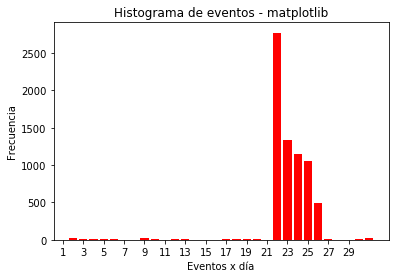

In [10]:
ejes = df_Logins.groupby("dia_num").count()["logdesc"]
#print(ejes)
intervalos = range(1,30,2)


plt.bar(ejes.index, ejes.values, color = "red")   
plt.title('Histograma de eventos - matplotlib')
plt.xlabel('Eventos x día')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

#### En splunk, en su histograma, acumula por hora de cada día. Pero no lo puedo representar con el matplotlib.

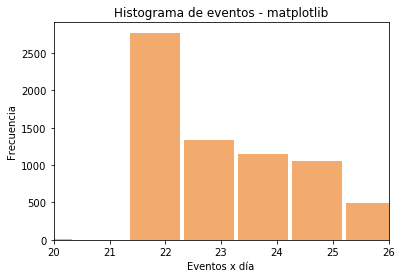

In [54]:

#ejes_subset = df_Logins.groupby(["dia_num","hora"]).count()["logdesc"]
#print(ejes_subset)
intervalos = range(20,27,1)
#plt.figure(figsize=(8,2))
#fig, ax = plt.subplots()
plt.hist(df_Logins["dia_num"], bins=30, color='#F2AB6D', rwidth = 0.92)   # rwidth es el ancho de las barras.
                                                  # 1 es el max y quedan pegadas
plt.title('Histograma de eventos - matplotlib')
plt.xlabel('Eventos x día')
plt.ylabel('Frecuencia')
plt.xlim([20,26])

plt.xticks(intervalos)
#plt.subplots_adjust(left=0.95)
#fig.set_figure(figsize=(10,4))
#fig.set_size_inches(200,100)
#plt.savefig("histograma.pdf")
plt.show()

###ME CONVIENE EL GRAFICO DE BARRAS UTILIZANDO EL GROUPBY'''

In [22]:
intervalos.size()

AttributeError: 'range' object has no attribute 'size'

In [55]:
df_Logins.columns

Index(['dia_nombre', 'mes_nombre', 'dia_num', 'año_num', 'Servidor', 'vd',
       'type', 'subtype', 'accion', 'devname', 'eventtime', 'level', 'logdesc',
       'msg', 'reason', 'remip', 'tunneltype', 'user', 'hora', 'minuto',
       'segundo'],
      dtype='object')

In [71]:
df_Logins[(df_Logins["dia_num"] > 21) & 
          (df_Logins["dia_num"] < 27)].groupby("remip").count().sort_values("logdesc", 
                                                                            ascending=False)["logdesc"].head(10)


remip
222.189.163.82     16
124.42.68.14       12
181.46.83.148      10
51.38.122.111       7
58.33.118.115       6
186.179.100.255     6
1.202.88.114        5
186.96.173.144      5
121.148.63.176      5
177.22.208.173      5
Name: logdesc, dtype: int64

In [74]:
print(df_Logins[(df_Logins["dia_num"] > 21) & 
          (df_Logins["dia_num"] < 27)].groupby("user").count().sort_values("logdesc", 
                                                                            ascending=False)["logdesc"].head(10))

user
teste            190
servidor         171
usuario          171
administrador    165
remoto            89
financeiro        70
contabilidad      68
sistemas          68
contador          66
fernando          65
Name: logdesc, dtype: int64


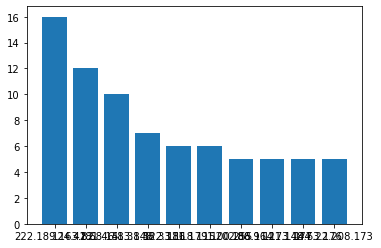

In [84]:
df_brute_force = df_Logins[(df_Logins["dia_num"] > 21) & 
          (df_Logins["dia_num"] < 27)]
eje = df_brute_force.groupby("remip").count().sort_values("logdesc", ascending=False)["logdesc"].head(10)
plt.bar(eje.index, eje.values)
plt.savefig("barra.pdf")
plt.show()

In [82]:
eje.values

array([ 1,  1,  1, ..., 10, 12, 16])

In [ ]:
plt.bar(eje.index, eje.values)
plt.savefig("barra.pdf")
plt.show()